In [40]:
#Importing Libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
#Loading Satellite images  
import os
os.listdir (r'C:\Users\CHANDA\Desktop\NDVI project\landsat')

['LC08_L1TP_147040_20191028_20191030_01_T1_ANG.txt',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B1.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B10.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B11.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B2.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B3.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B4.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B5.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B6.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B7.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B8.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_B9.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_BQA.TIF',
 'LC08_L1TP_147040_20191028_20191030_01_T1_MTL.txt']

In [42]:
#Loading red and nir band images
band4 = rasterio.open(r'C:\Users\CHANDA\Desktop\NDVI project\landsat\LC08_L1TP_147040_20191028_20191030_01_T1_B4.TIF') #this is the red band
band5 = rasterio.open(r'C:\Users\CHANDA\Desktop\NDVI project\landsat\LC08_L1TP_147040_20191028_20191030_01_T1_B5.TIF') #this is the (nir) infra-red band


In [43]:
#Exploring bands
print(band4.height) #no. of rows in red band image
print(band5.height) #no. of rows in nir band image

7741
7741


In [44]:
print(band4.width) #no. of columns red band image
print(band5.width) #no. of columns in nir band image

7601
7601


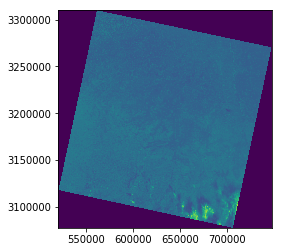

In [45]:
#Plotting the red band
plot.show(band4)

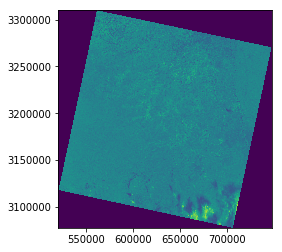

In [46]:
#Potting the nir band
plot.show(band5)

In [47]:
band4.dtypes[0]

'uint16'

In [48]:
band4.crs

CRS.from_dict(init='epsg:32643')

In [49]:
band4.transform

Affine(30.0, 0.0, 519885.0,
       0.0, -30.0, 3309915.0)

In [50]:
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

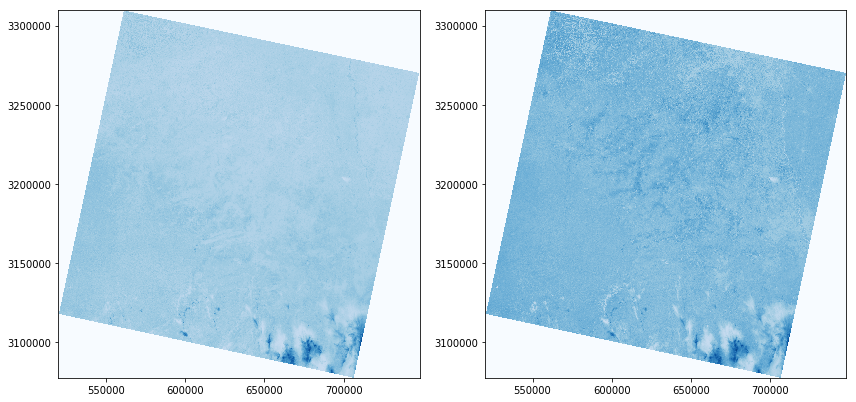

In [51]:
# Multiple band representation
fig,(ax1, ax2) = plt.subplots(1 ,2, figsize=(12,6))
plot.show(band4, ax=ax1, cmap='Blues') #for red
plot.show(band5, ax=ax2, cmap='Blues')#for nir
fig.tight_layout()


In [21]:
#Extract the data from the red and near-infrared bands
red=band4.read(1).astype('float64')
nir=band5.read(1).astype('float64')

In [ ]:
#Perform the NDVI calculation
ndvi = np.where(
        
      (nir-red)/(nir+red)
)


In [ ]:
# Save the NDVI image
ndviImage= rasterio.open('C:\\Users\\CHANDA\\Desktop\\NDVI project\\output\\ndvi image', 'w',
                        driver='Gtiff', width=red.width, height= red.height,
                        count=1,
                        crs=band4.crs,
                        transform= band4.transform,
                        dtype='int64')
ndviImage.write(ndvi,1)
ndviImage.close()

In [54]:
# Do not display error when divided by zero 

np.seterr(divide='ignore', invalid='ignore')

# NDVI 
ndvi = (band5.read(1).astype(float) - band4.read(1).astype(float)) / (band5.read(1).astype(float) + band4.read(1).astype(float))
ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=1.0)

fig2.savefig("output/ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)